In [68]:
%matplotlib notebook

Miguel dos Reis - RA: 11201721738

# Integração numérica de dinâmicas simples

Atividade a ser entregue individualmente via Moodle (prazo: 18/10). Idealmente, basta submeter um *Jupyter notebook* com código, figuras e anotações; caso não esteja usando *notebooks*, submeter arquivos de código e um *pdf* com as figuras e comentários.


## A classe de dinâmicas de interesse

Ao discutir modelos mínimos para neurônios, determinamos as condições para que uma dinâmica unidimensional tenha um ponto de equilíbrio estável, correspondente ao potencial de repouso de um neurônio.

Vimos que, para tanto, basta que a dinâmica (derivada) tenha uma raiz no potencial de equilíbrio (derivada nula implica que não saímos do ponto, ou seja, é um equilíbrio), e que perto deste ponto a função "se pareça" com uma reta de inclinação negativa (para que, se perturbarmos o estado para fora do equilíbrio, a dinâmica o traga de volta):
<p>
<img style="height:200px" height="200px" src="https://github.com/borismarin/sample-data/raw/master/neuro-comp/iaf.png" align="center"/>
</p>


Vimos também que, ao aplicar a conservação da carga elétrica a um circuito RC em paralelo (conforme figura), obtemos uma dinâmica deste tipo para o potencial elétrico $V$ sobre o capacitor:
<p>
<img style="height:200px" height="200px" src="https://github.com/borismarin/sample-data/raw/master/neuro-comp/rc.png" align="center"/>
</p>
$$
\tag{1}
\frac{\mathrm{d}V}{\mathrm{d}t} = -\frac{V}{RC}
$$

0. Faça um desenho similar à primeira figura acima, mas para a dinâmica do circuito RC. Preste atenção (coloque no seu desenho) no valor do ponto de equilíbrio e da inclinação da reta.

## Resolvendo a equação analiticamente

A equação para o circuito RC acima pode ser resolvida analiticamente de forma imediata (veja só: o que ela diz, essencialmente, é "qual é a função cuja derivada é ela mesma multiplicada por uma constante?"). Caso você não ache que é imediato, vale a pena dar uma relembradinha em FUV (especificamente, derivadas de funções exponenciais e regra da cadeia).

1. Resolva a equação do circuito RC (eq. 1 acima) analiticamente (ou seja, econtre a função $V(t)$, supondo que o potencial incial $V(t=0)$ sobre o capacitor é $V_0$. 

A função cuja derivada é ela mesma é e^x. Logo, para a equação do circuito RC tem-se: V(t) = cte * e ^ (-t/RC)

## Resolvendo a equação numericamente

Não são todas as equações diferencial que podem ser resolvidas analiticamente. Isso não significa que estas equações não tenham soluções: em muitos casos, podemos utilizar métodos numéricos (que são estudados em mais detalhe no curso de Cálculo Numérico) para obter soluções aproximadas.

### Método de Euler
A maneira mais simples de resolver uma equação diferencial numericamente é utilizando o Método de Euler. Para entender como ele funciona, basta entender a definição de derivada, retratada na figura abaixo:

<p>
<img style="height:200px" height="200px" src="https://github.com/borismarin/sample-data/raw/master/neuro-comp/deltax.png" align="center"/>
</p>

Para calcular a inclinação da reta tangente ao gráfico da função $y(t)$ (vermelho) no ponto $P$, começamos com a reta secante (azul) passando por P e Q, cuja inclinação é $\frac{y(t_0+h)-y(t_0)}{h}$. Conforme trazemos Q mais para perto de P (diminuímos $h$), vamos tendo aproximações sucessivamente melhores para a reta tangente. No limite de Q indo a P ($h\to 0$), chegamos à definição de derivada:
$$
y'(t_0) = \lim_{h\to 0}\frac{y(t_0+h)-y(t_0)}{h}\tag{2}
$$

Ao resolver uma equação diferencial, queremos determinar $y(t)$ dadas suas derivadas: se a equação for de primeira ordem (o único tipo que trataremos neste curso), queremos determinar $y(t)$ dada uma expressão para sua primeira derivada $y'=f(t,y)$ (note que a derivada pode ser uma função tanto de $y$ quanto de $t$) e uma condição inicial $y(t_0)$. Isso se chama um _problema de valor inicial_. 

Note que a definição de derivada (eq 2) acima nos fornece uma relação entre $y'$ e o valor $y$ nos instantes $t_0$ e $t_0+h$, com h infinitesimal. Considerando agora um valor finito (mas pequeno) para $h$, temos uma aproximação numérica para a derivada:
$$
y'(t_0) \approx \frac{y(t_0+h)-y(t_0)}{h}, \qquad 0<h\ll1
$$

Rearranjando a equação acima, podemos obter um valor aproximado para $y(t_0+h)$, dados $y(t_0)$ e $y'=f(t, y)$ :
$$
y(t_0+h) \approx y(t_0) + hf(t_0, y_0)\tag{3}
$$

Considerando que a variável independente (para nossos propósitos, sempre o tempo) avança em passos discretos de tamanho $h$, (ou seja, $[t_0, \underbrace{t_0+h}_{t_1}, \ldots]$), vamos gerando iterativamente aproximações para $y_i$ segundo a equação 3:


$$\tag{4}
y_{i+1} = y_i + h f(t_i, y_i)
$$


Ou seja, calculamos o próximo valor $y_{i+1}$ a partir do valor atual $y_i$ e do valor atual da derivada  $f(t_i, x_i)$. Este é o **Método de Euler**.



## Exercitando

Para exercitar tanto o conteúdo visto acima quanto nossas habilidades em programação, vamos escrever um programa que implemente o Método de Euler (eq. 4) para resolver a equação do circuito RC (para a qual você obteve a solução analítica). Comparar os dois resultados é uma boa forma de determinar se seu código está funcionando. 

Abaixo, há uma célula de código com uma estrutura sugerida para o código. Leia, **entenda** sua relação com o algoritmo descrito acima, e preencha as partes incompletas do código.

In [151]:
import numpy as np
import matplotlib.pyplot as pp

# dinâmica para o potencial sobre o capacitor num circuito RC (dV/dt)
def circuito_rc(V, R=1, C=1):
    return - V / (R*C)

def plot_from_euler_method(Vzero=1, R=1, C=1, h = 0.01):

    passos = int(10/h)   # quantos passos dar

    t = np.zeros(passos)  # Array para valores do tempo t_i
    V = np.zeros(passos)  # Array para valores dos potenciais V_i
    V[0] = Vzero  # O primeiro valor de V é a condição inicial


    for i in range(passos - 1):  # avançando cada passo 
        t[i + 1] = t[i] + h  # atualizamos e armazenamos o tempo
        V[i + 1] = V[i] + h * circuito_rc(V[i])  # implemente o passo do Método de Euler aqui!

    pp.plot(t,V)
    pp.xlabel('Tempo (UA)')
    pp.ylabel('dV/dt')

def plot_analitical_solution():
    tempo = np.array(range(1000))/100
    V = np.exp(-tempo)
    pp.plot(tempo, V)

## Resolvendo o circuito RC numericamente

2. Integre a dinâmica do circuito RC usando o programa escrito acima. Faça gráficos de séries temporais $V(t)$ e discuta:
  - qual é o efeito de mudanças na condição inicial $V(t=0$)?
  - qual é efeito de mudanças nos parâmetros $R, C$ do circuito?


3. Compare o resultado de uma integração numérica em particular (tome $R=C=V_0=1$ e dê 1000 passos de tamanho $h=0.01$. Qual é o tempo total de integração nestes caso?) com a solução analítica encontrada no item (1) desta lista (faça um gráfico superpondo ambas as curvas). 


4. Mantendo o tempo total de integração constante (produto do número de passos pelo tamanho do passo), veja até quanto é possível aumentar `h` antes de começarem a aparecer erros numéricos sérios (use a solução analítica como referência). Note que quanto menos passos dermos para atingir o tempo final de integração, mais rápido terminará nosso programa − então, é interessante poder aumentar $h$, mas sempre tomando cuidado com o erro numérico!

### Questão 2

<IPython.core.display.Javascript object>


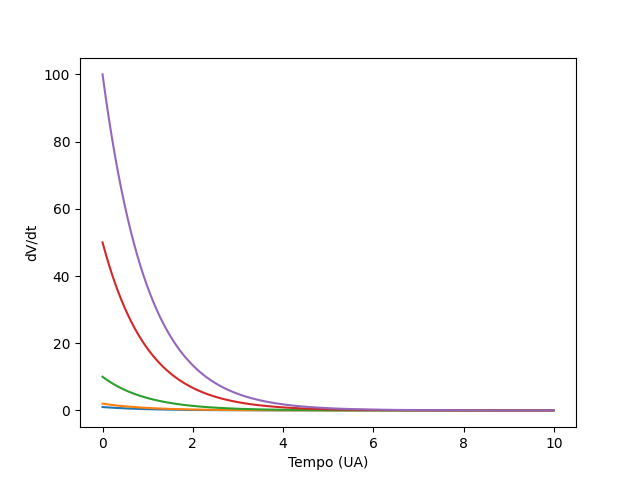

In [152]:
#Variando Vzero
pp.figure()
plot_from_euler_method(1)
plot_from_euler_method(2)
plot_from_euler_method(10)
plot_from_euler_method(50)
plot_from_euler_method(100)

<IPython.core.display.Javascript object>


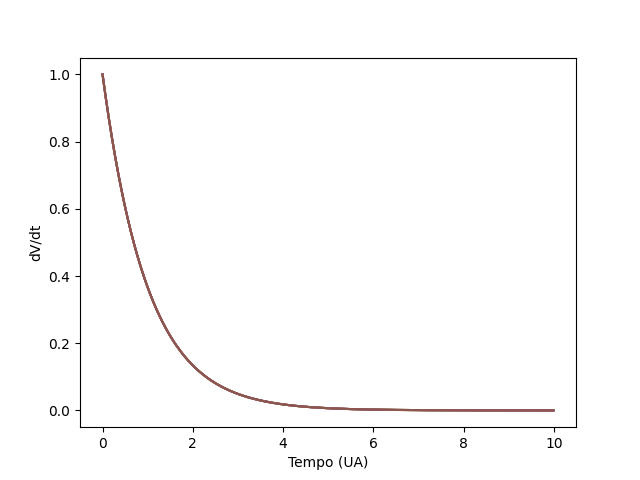

In [153]:
#Variando R e C
pp.figure()
plot_from_euler_method(1)
plot_from_euler_method(1, 1, 2)
plot_from_euler_method(1, 2, 2)
plot_from_euler_method(1, 10, 2)
plot_from_euler_method(1, 10, 10)
plot_from_euler_method(1, 50, 50)


Disso conclui-se que:
- Ao variar a condição inicial, o valor máximo se altera, mas a tendência se mantém, de forma que o gráfico sempre termina aproximadamente no mesmo valor
- Não existe efeito causado pela variação de R e C, o comportamento não se altera

### Questão 3


<IPython.core.display.Javascript object>


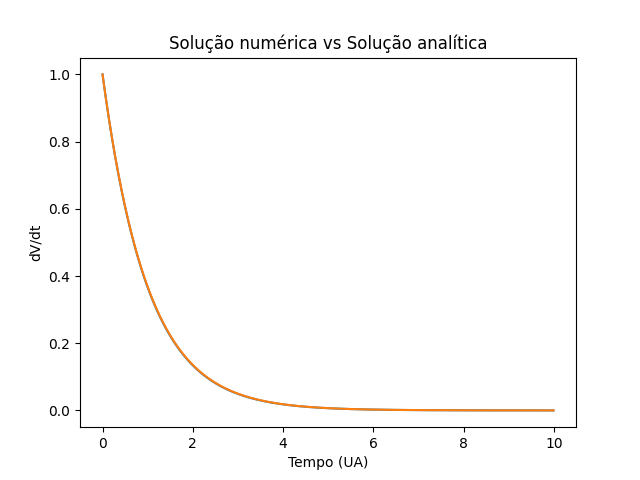

Text(0.5, 1.0, 'Solução numérica vs Solução analítica')

In [107]:
#gráfico para a resolução numérica
pp.figure()
plot_from_euler_method()
plot_analitical_solution()
pp.title('Solução numérica vs Solução analítica')

O tempo total da integração é 10 unidades, visto que o passo é de 0.01, incrementado 1000 vezes.
Com esse valor para o passo, os gráficos resultantes são muito próximos

### Questão 4

<IPython.core.display.Javascript object>


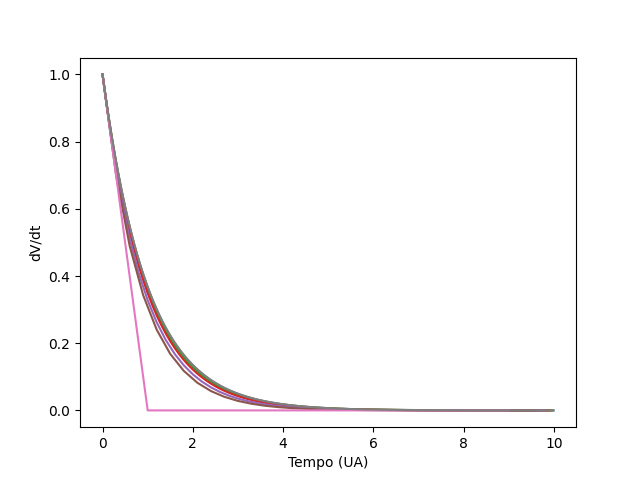

In [154]:
pp.figure()
plot_from_euler_method(h=0.01)
plot_from_euler_method(h=0.02)
plot_from_euler_method(h=0.05)
plot_from_euler_method(h=0.1)
plot_from_euler_method(h=0.2)
plot_from_euler_method(h=0.3)
plot_from_euler_method(h=1)
plot_analitical_solution()

A partir de aproximadamente 0.1 já é possível se observar uma distorção bastante notável